In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv("creditcard.csv")
df.head()
df.dropna(inplace = True)

In [25]:
from sklearn.model_selection import train_test_split

X = df.drop("Class" ,axis = 1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Epoch 1/10
4658/4658 [==============================] - 23s 5ms/step - loss: 21.4962 - accuracy: 0.9938 - val_loss: 0.4751 - val_accuracy: 0.9976
Epoch 2/10
4658/4658 [==============================] - 19s 4ms/step - loss: 2.5506 - accuracy: 0.9960 - val_loss: 2.0506 - val_accuracy: 0.9981
Epoch 3/10
4658/4658 [==============================] - 20s 4ms/step - loss: 0.8167 - accuracy: 0.9957 - val_loss: 0.0223 - val_accuracy: 0.9984
Epoch 4/10
4658/4658 [==============================] - 19s 4ms/step - loss: 0.0523 - accuracy: 0.9981 - val_loss: 0.0204 - val_accuracy: 0.9981
Epoch 5/10
4658/4658 [==============================] - 19s 4ms/step - loss: 0.3297 - accuracy: 0.9955 - val_loss: 0.0595 - val_accuracy: 0.9984
Epoch 6/10
4658/4658 [==============================] - 18s 4ms/step - loss: 0.2662 - accuracy: 0.9968 - val_loss: 0.0555 - val_accuracy: 0.9981
Epoch 7/10
4658/4658 [==============================] - 19s 4ms/step - loss: 0.0603 - accuracy: 0.9975 - val_loss: 0.0433 - val_a

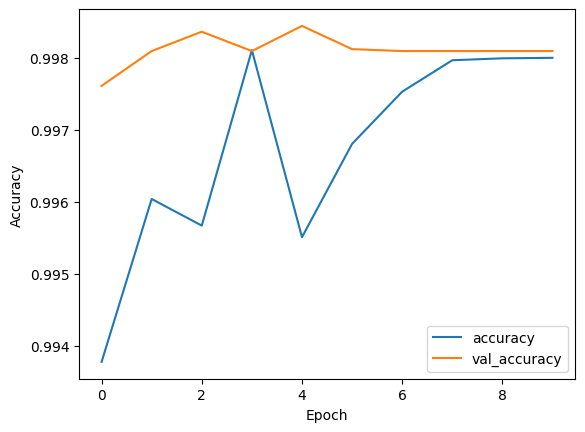

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming you have your data loaded into X_train, y_train for training,
# and X_test, y_test for testing/validation.

# Define the model architecture
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(128, activation = 'relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # For binary classification
              metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

# Optionally, you can plot the training history to visualize training/validation loss and accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


In [35]:
y_pred_ann = model.predict(X_test)

1165/1165 [==============================] - 2s 1ms/step


In [36]:


model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 512)               15872     
                                                                 
 dense_28 (Dense)            (None, 128)               65664     
                                                                 
 dense_29 (Dense)            (None, 128)               16512     
                                                                 
 dense_30 (Dense)            (None, 1)                 129       
                                                                 
Total params: 98177 (383.50 KB)
Trainable params: 98177 (383.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
X_train.shape[0]

149026

In [44]:
from sklearn.metrics import classification_report , confusion_matrix , log_loss

print(classification_report(y_test , pred_nn))
print(confusion_matrix(y_test, pred_nn))
print(log_loss(y_test , pred_nn))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     37186
         1.0       0.00      0.00      0.00        71

    accuracy                           1.00     37257
   macro avg       0.50      0.50      0.50     37257
weighted avg       1.00      1.00      1.00     37257

[[37186     0]
 [   71     0]]
0.06868774701740146


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
pred_nn = [0] * len(y_test)
for i in range(len(y_test)):
  if y_pred_ann[i] > 0.5:
    pred_nn[i] = 1
  else:
    pred_nn[i] = 0